# ML Nb. 17. GridSearchCV
***

### Compiled by Amit Purswani
LinkedIn: https://www.linkedin.com/in/amit-purswani-2a073777/
***

<b>GitHub Repositories</b>
1. Data Analysis:
https://github.com/kranemetal/Data-Analysis-Projects

2. Machine Learning:
https://github.com/kranemetal/MachineLearning
*******

## Hyperparameters vs Parameters

### Parameters and Hyperparameters both are associated with the Machine Learning model, but both are meant for different tasks. Let’s understand how they are different from each other in the context of Machine Learning.

>__Parameters__ are the variables that are used by the Machine Learning algorithm for predicting the results based on the input historic data.
- These are estimated by using an optimization algorithm by the Machine Learning algorithm itself. Thus, these variables are not set or hardcoded by the user or professional.
- These variables are served as a part of model training. 
- Example of Parameters: __Coefficient__ of independent variables Linear Regression and Logistic Regression.<br>

>__Hyperparameters__ are the variables that the user specifies usually while building the Machine Learning model.
- Thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model.
- The best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms, k in KNN Classifier.

Source: AnalyticsVidhya

### Difference between Parameter and Hyperparameter
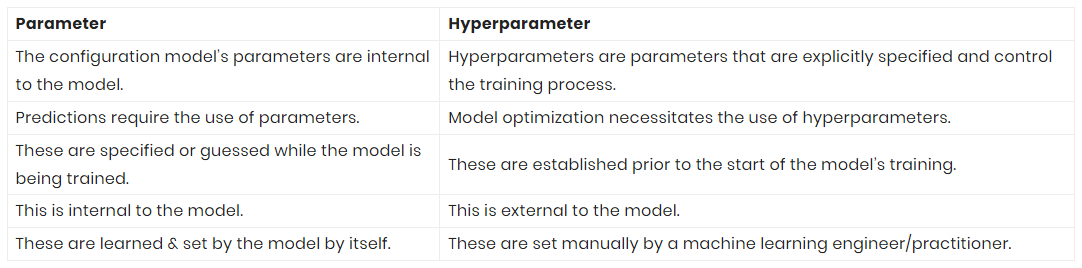
Source: GreatLearning

## GridSearchCV

### What is GridSearchCV
- It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. 
- The performance of a model significantly depends on the value of hyperparametersand there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values.
- Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.
- GridSearchCV is a function that comes in Scikit-learn’s(or SK-learn) model_selection package.
- This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

### How does GridSearchCV work?
- As mentioned above, we pass predefined values for hyperparameters to the GridSearchCV function.
- We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take. Here is an example of it.

 { 'C': [0.1, 1, 10, 100, 1000],  
   'gamma': [1, 0.1, 0.01, 0.001, 0.0001], <br>
   'kernel': ['rbf',’linear’,'sigmoid']  } <br> 

__Note:__ Here C, gamma and kernels are some of the hyperparameters of an SVM model. Note that the rest of the hyperparameters will be set to their default values. <br><br>

- GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method.
- Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

### GridSearchCV Function

Let us see what are the various arguments that are taken by GridSearchCV function:

>sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None,<br>
          n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, <br>
          pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)<br>

We are going to briefly describe a few of these parameters here:

1. estimator: Pass the model instance for which you want to check the hyperparameters.
2. params_grid: the dictionary object that holds the hyperparameters you want to try
3. scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric
4. cv: number of cross-validation you have to try for each selected set of hyperparameters
5. verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
6. n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors. 

Source: GreatLearning

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataset

In [2]:
df = pd.read_csv('C:\\Users\krane\Desktop\datasets\Social_Network_Ads.csv')

### Basic checks on dataset

In [3]:
df.shape

(400, 3)

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Splitting independent variable X and dependent variable Y

In [8]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Splitting the train and test datasets

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Train Kernel SVM model on Train set

In [11]:
from sklearn.svm import SVC
classifier = SVC (kernel = 'rbf', random_state=0) #Using RBF Kernel
classifier.fit(x_train, y_train) 

SVC(random_state=0)

### Predicting on Test set

In [12]:
y_pred = classifier.predict(x_test)

### Checking the confusion matrix and accuracy score

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) #confusion matrix(actual, predicted)
print(cm)
accuracy_score(y_test, y_pred) #accuracy score (actual, predicted)

[[72  7]
 [ 4 37]]


0.9083333333333333

### Applying K-fold cross validation

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=x_train, y=y_train, cv=10) # K is 10, generally chosen value
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracies.std()))

Accuracy: 90.71%
Standard Deviation: 0.05


### Applying GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV
parameters = [
{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']}, #C is regularization parameter
{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]} #gamma is for non-linear hyperplane
]
grid_search = GridSearchCV(estimator = classifier,
param_grid = parameters,
scoring = 'accuracy',
cv = 10,
n_jobs = -1  # -1 means use all processors available on computer
)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Accuracy:", best_parameters)

Best Accuracy: 91.79 %
Best Accuracy: {'C': 0.25, 'gamma': 0.9, 'kernel': 'rbf'}


### <center>The End